In [53]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,recall_score ,roc_auc_score, roc_curve, classification_report,accuracy_score, confusion_matrix, auc,precision_score 

In [32]:
base_full = pd.read_csv('C:\\Users\\flavi\\Google Drive\\Estudos\\Formação em Data Science\\Estudos\\Classificacao\\Bases\\diabetes.csv')
base_full.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Data Prep:
- analisar se existes dados fautantes
- analisar ver a distribuição dos dados
- analisar o balanceamento das classes

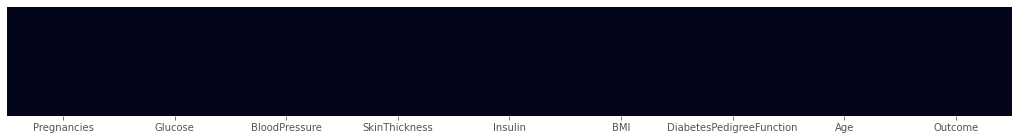

In [33]:
plt.figure(figsize=(18,2))
sns.heatmap(base_full.isnull(), cbar=False, yticklabels=False);

In [34]:
base_full.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
base_full.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [36]:
def standarscaler(df, lista):
    stderscaler = StandardScaler()
    for item in lista:
        df[[item]] = stderscaler.fit_transform(df[[item]])
    return df

In [37]:
def MinMaxSc(df, lista):
    Minmax = MinMaxScaler()
    for item in lista:
        df[[item]] = Minmax.fit_transform(df[[item]])
    return df

In [38]:
lista = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df_result_StandScaler = standarscaler(base_full,lista)
df_result_StandScaler.describe()

Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean   2.544261e-17  3.614007e-18  -1.327244e-17   7.994184e-17 -3.556183e-17   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00  -3.572597e+00  -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01  -3.673367e-01  -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01   1.496408e-01   1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01   5.632228e-01   7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00   2.734528e+00   4.921866e+00  6.652839e+00   

                BMI  DiabetesPedigreeFunction           Age     Outcome  
count  7.680000e+02              7.680000e+02  7.680000e+02  768.000000  
mean   2.295979e-16              2.398978e-16  1.857600e-16    0.348958  
std    1.000652e+00              1.000652e+00  1.000652e+00    0.476951  
min   -4.060474e+00             -1.189553e+00 -1.041549e+00    0.000000  
25%   -5.955785e-01             -6.889685e-01 -7.862862e-01    0.000000  
50%    9.419788e-04             -3.001282e-01 -3.608474e-01    0.000000  
75%    5.847705e-01              4.662269e-01  6.602056e-01    1.000000  
max    4.455807e+00              5.883565e+00  4.063716e+00    1.000000

In [39]:
lista = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df_normal = MinMaxSc(df_result_StandScaler, lista)
df_normal.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.226180    0.607510       0.566438       0.207439    0.094326   
std       0.198210    0.160666       0.158654       0.161134    0.136222   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.497487       0.508197       0.000000    0.000000   
50%       0.176471    0.587940       0.590164       0.232323    0.036052   
75%       0.352941    0.704774       0.655738       0.323232    0.150414   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     0.476790                  0.168179    0.204015    0.348958  
std      0.117499                  0.141473    0.196004    0.476951  
min      0.000000                  0.000000    0.000000    0.000000  
25%      0.406855                  0.070773    0.050000    0.000000  
50%      0.476900                  0.125747    0.133333    0.000000  
75%      0.545455                  0.234095    0.333333    1.000000  
max      1.000000                  1.000000    1.000000    1.000000

In [40]:
df_normal.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

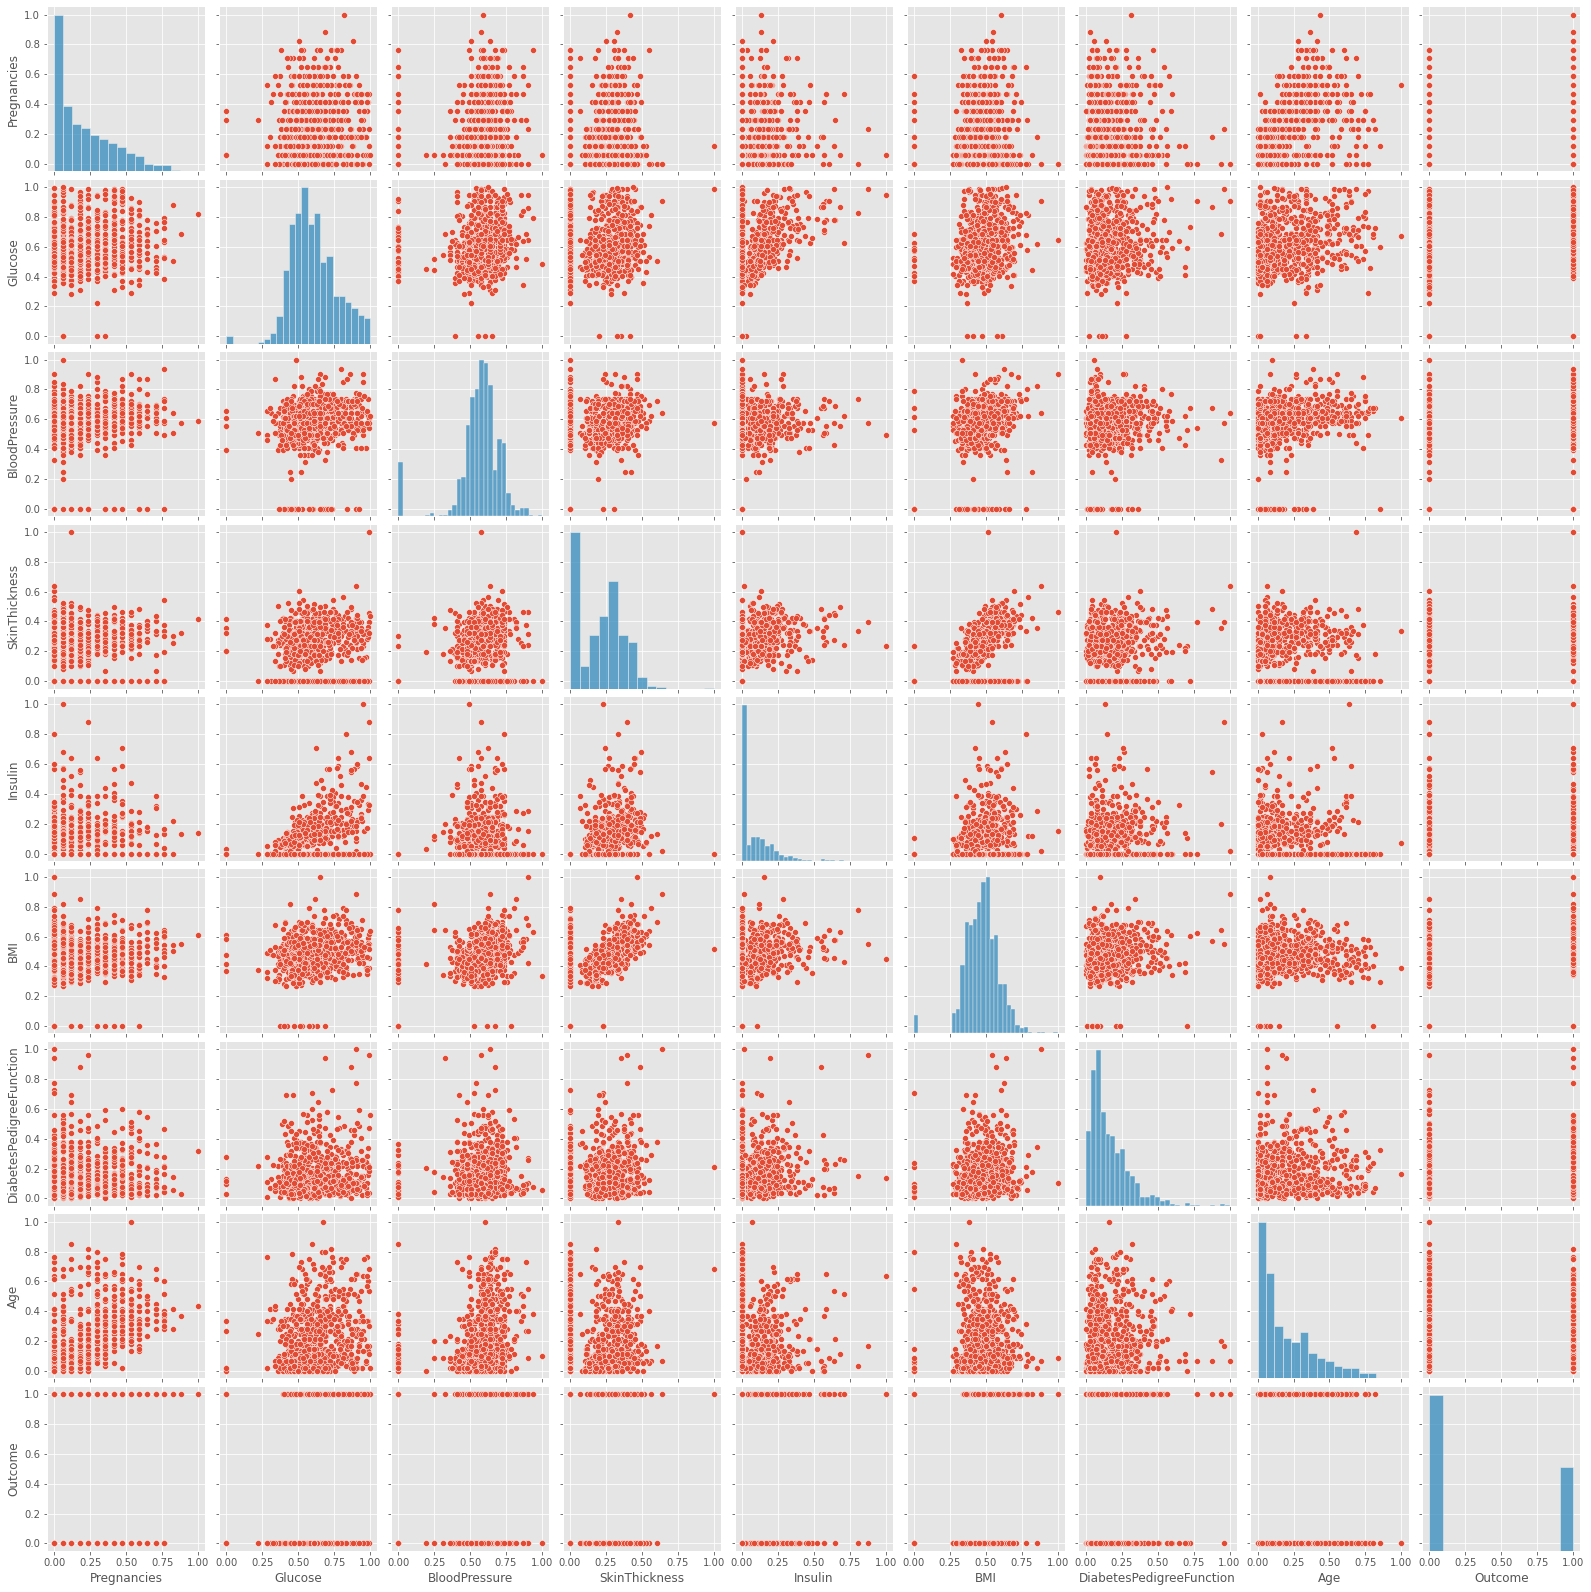

In [41]:
#x = df_normal.iloc[:,0:8]
#y = df_normal.iloc[:,8:9]

#sns.pairplot(df_result_StandScaler)
#plt.show()

#sns.pairplot(df_normal)
#plt.show()

sns.pairplot(base_full)
plt.show()

Class 0: 500
Class 1: 268
Proporção de Desbalanceamento: a base possui  1.87  Class 0 (não diabéticos), para  1.0 Class 1(diábeticos).


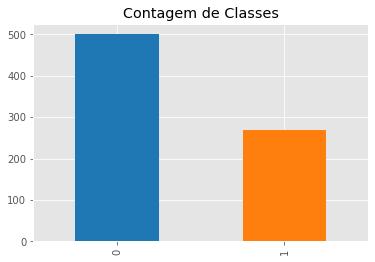

In [42]:
target_count = df_normal.Outcome.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proporção de Desbalanceamento: a base possui ', round(target_count[0] / target_count[1], 2), ' Class 0 (não diabéticos), para  1.0 Class 1(diábeticos).')
target_count.plot(kind='bar', title='Contagem de Classes',color = ['#1F77B4', '#FF7F0E']);

In [43]:
df_normal.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1

In [44]:
X = df_normal.iloc[:,:-1]
y = df_normal.iloc[:,-1:]

### Utilizando o Naive Bayes para classificar pessoas que posuem diabetes

Número de pontos errados de um total 231 points : 55

****************************************************************
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231


****************************************************************
Acurácia: 0.761905
Precision: 0.666667
Recall: 0.513514
F1-Score: 0.580153
Roc_auc_score: 0.580153

****************************************************************


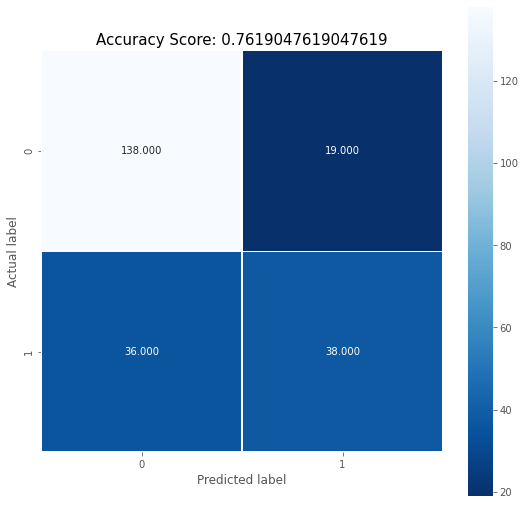

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)


print("Número de pontos errados de um total %d points : %d" % (X_test.shape[0], (y_test != y_pred.reshape(231,1)).sum()))
print()
print('****************************************************************')
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
print()
print('****************************************************************')

#

gnb_prob = gnb.predict_proba(X_test)
probs = gnb_prob[:, 1]
rfp, rvp,lim = roc_curve(y_test, probs)

#
acuracia = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test,probs)
print('Acurácia: %f' % acuracia)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1-Score: %f' % f1)
print('Roc_auc_score: %f' % f1)
print()
print('****************************************************************')
score = gnb.score(X_test,y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

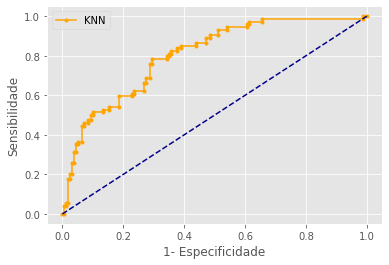

In [46]:
# Gráfico da curva roc
plt.plot(rfp, rvp, marker='.', label='KNN',color="orange")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()

In [58]:
scores_accuracy = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy').mean()
scores_precision = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='precision').mean()
scores_recall = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='recall').mean()
scores_f1 = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='f1').mean()
scores_roc_auc = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='roc_auc').mean()
print('****************************************************************')
print('Validando com K-fold Cross Validation')
print('****************************************************************')
print('Acurácia: %f' % scores_accuracy)
print('Precision: %f' % scores_precision)
print('Recall: %f' % scores_recall)
print('F1-Score: %f' % scores_f1)
print('Roc_auc_score: %f' % scores_roc_auc)
print()

****************************************************************
Validando com K-fold Cross Validation
****************************************************************
Acurácia: 0.746681
Precision: 0.668257
Recall: 0.613947
F1-Score: 0.634059
Roc_auc_score: 0.816497



In [59]:
 # implementar as outras variações do KNN 
    
naive_bayes.BernoulliNB(*[, alpha, …])

Naive Bayes classifier for multivariate Bernoulli models.

naive_bayes.CategoricalNB(*[, alpha, …]) ok

Naive Bayes classifier for categorical features

naive_bayes.ComplementNB(*[, alpha, …])

The Complement Naive Bayes classifier described in Rennie et al.

naive_bayes.GaussianNB(*[, priors, …])

Gaussian Naive Bayes (GaussianNB)

naive_bayes.MultinomialNB(*[, alpha, …])

Naive Bayes classifier for multinomial models

SyntaxError: invalid syntax (<ipython-input-59-7dbf1bd378e6>, line 3)